# Analyzing our Mountain Project Climbing Route Data

## Data Pre-Processing

### Read in the Mountain Project csv into pandas dataframe

In [1]:
# Importing modules
import pandas as pd

file_path = "dataset/mp_routes.csv"

# Read data into papers
df = pd.read_csv(file_path)

# Print head
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/mp_routes.csv'

In [52]:
# Print the column names
print(df.columns)

# Print number of rows
print("Number of routes:", len(df))

Index(['Unnamed: 0', 'Route', 'Location', 'URL', 'Avg Stars', 'Route Type',
       'Rating', 'Pitches', 'Length', 'Area Latitude', 'Area Longitude',
       ' desc', ' protection', ' num_votes'],
      dtype='object')
Number of routes: 116700


In [53]:
# Remove the columns
df = df.drop(columns=['Unnamed: 0', 'URL', 'Route Type', 'Pitches', 'Length', 'Area Latitude', 'Area Longitude', ' protection', ' num_votes'], axis=1)

# Print out the first rows of papers
df.head()

,Route,Location,Avg Stars,Rating,desc
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,2.9,5.10b/c,This is a really great route~ with awesome exp...
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,2.0,5.10b/c,from tabvar: Cool fins to roof~ thin holds...
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,2.7,5.10b/c,A safe mixed route with a bit of run out up to...
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,2.0,5.10b/c,Start on a slab under a left leaning arched ro...
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,3.0,5.10b/c,Fun technical climbing. Tricky right off the bat.


In [54]:
print(df.columns)

Index(['Route', 'Location', 'Avg Stars', 'Rating', ' desc'], dtype='object')


### Remove any rows with 0 length descriptions or more than 2000 word descriptions

In [55]:
# Print the number of rows before removal
print("Number of rows before removal:", len(df))

# Remove rows with descriptions containing 0 words or more than 2000 words
df = df[(df[' desc'].str.split().str.len() > 0) & (df[' desc'].str.split().str.len() <= 2000)]

# Print the number of rows after removal
print("Number of rows after removal:", len(df))

Number of rows before removal: 116700
Number of rows after removal: 116430


In [56]:
df[' desc'].head()

0    This is a really great route~ with awesome exp...
1    from tabvar:     Cool fins to roof~ thin holds...
2    A safe mixed route with a bit of run out up to...
3    Start on a slab under a left leaning arched ro...
4    Fun technical climbing. Tricky right off the bat.
Name:  desc, dtype: object

### Remove any routes with non-English descriptions

In [60]:
from langdetect import detect

# Function to check if a text is in English using langdetect
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False
    
# Remove rows where the description is not in English
df = df[df[' desc'].apply(is_english)]

# Print the number of rows after removal of non-English
print("Number of rows after removal:", len(df))

Number of rows after removal: 112699


### Remove punctuation and lowercase all descriptions

In [62]:
import string

# Remove punctuation and convert to lowercase
def clean_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    return text.lower()

# Apply text cleaning to the description column
df[' desc'] = df[' desc'].apply(clean_text)

df.head()

,Route,Location,Avg Stars,Rating,desc
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,2.9,5.10b/c,this is a really great route with awesome expo...
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,2.0,5.10b/c,from tabvar cool fins to roof thin holds o...
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,2.7,5.10b/c,a safe mixed route with a bit of run out up to...
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,2.0,5.10b/c,start on a slab under a left leaning arched ro...
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,3.0,5.10b/c,fun technical climbing tricky right off the bat


###  Save cleaned data to csv

In [2]:
df.to_csv("mp_routes_clean.csv", encoding='utf-8', index=False)

NameError: name 'df' is not defined

### Read in cleaned data

In [1]:
# Importing modules
import pandas as pd

file_path = "mp_routes_clean.csv"

# Read data into papers
df = pd.read_csv(file_path)

# Print head
df.head()

,Route,Location,Avg Stars,Rating,desc
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,2.9,5.10b/c,this is a really great route with awesome expo...
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,2.0,5.10b/c,from tabvar cool fins to roof thin holds o...
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,2.7,5.10b/c,a safe mixed route with a bit of run out up to...
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,2.0,5.10b/c,start on a slab under a left leaning arched ro...
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,3.0,5.10b/c,fun technical climbing tricky right off the bat


After cleaning there are 112,699 climbing routes.

## Some Exploratory Analysis

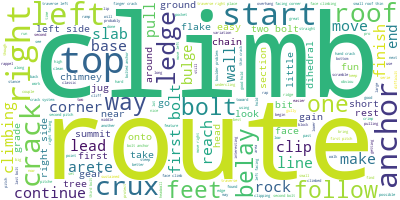

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df[' desc'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Topic Modeling

### Train Topic Model

In [2]:
import tomotopy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cfmci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Add certain climbing terms that are not route style related to our stoplist

In [3]:
more_stop_words = {"anchor", "bolt", "climb", "belay", "left", "right", "bolts", "climbed", "first", "ascent", "north", "east", "south", "west", 
                   "rap", "route", "pitch", "pro", "cam", "cams", "finish", "crux", "start", "classic", "quality", "excellent", "fun", "climbing", "bolted", 
                   "cruxes", "good", "great", "guide", "guidebook", "description", "book", "routes", "rating", "located", "side", "trail", "cliff", "approach", 
                   "rope", "drag", "top", "rated", "pitches", "ropes", "anchors", "rope", "lower", "bolted", "tree", "trees", "lead", "snow", "follow", "trad",
                   "gear"}

In [4]:
# 20-topic model populated with documents from our reviews (with stopwords removed)
stoplist = set(stopwords.words('english'))
stoplist.update(more_stop_words)

n_topics = 30
n_docs = len(df)

mdl = tomotopy.LDAModel(k=n_topics)
for desc in df[' desc']:
  words = desc.split()
  mdl.add_doc([w for w in words if w not in stoplist and w.isalpha()])

In [5]:
# Most converging will happen fast, but we'll run for 1000 iterations just in case
# (this will take a minute)
iters_per_check = 50
for i in range(0, 1000, iters_per_check):
    mdl.train(iters_per_check)
    print('Iteration: {}\tLog-likelihood: {}'.format(i+iters_per_check, mdl.ll_per_word))

Iteration: 50	Log-likelihood: -8.68709478646495
Iteration: 100	Log-likelihood: -8.52692628622366
Iteration: 150	Log-likelihood: -8.467581031825947
Iteration: 200	Log-likelihood: -8.434458457593834
Iteration: 250	Log-likelihood: -8.412124594573859
Iteration: 300	Log-likelihood: -8.397155146484033
Iteration: 350	Log-likelihood: -8.386770545643998
Iteration: 400	Log-likelihood: -8.37814189744951
Iteration: 450	Log-likelihood: -8.373711105207576
Iteration: 500	Log-likelihood: -8.36695892487354
Iteration: 550	Log-likelihood: -8.360209498404842
Iteration: 600	Log-likelihood: -8.357687645199919
Iteration: 650	Log-likelihood: -8.351064225550875
Iteration: 700	Log-likelihood: -8.350027334512614
Iteration: 750	Log-likelihood: -8.346690183849466
Iteration: 800	Log-likelihood: -8.34662289527872
Iteration: 850	Log-likelihood: -8.342850636266418
Iteration: 900	Log-likelihood: -8.342059164461466
Iteration: 950	Log-likelihood: -8.340179824340188
Iteration: 1000	Log-likelihood: -8.337029120788614


### Top 25 words per topic

In [6]:
# Print top 25 words of each topic
print("Top 25 words by topic")
for k in range(n_topics):
    print('#{}: {}'.format(k, ' '.join([w for (w, prop) in mdl.get_topic_words(k, top_n=25)])))

Top 25 words by topic
#0: moves face steep leads holds easier section thin easy slab sustained tricky technical hard rock bulge second bit interesting short nice move low starts ground
#1: feet line two three stars dihedral stone wall starts upper variation gold star four second last thin five climbs edges ramp one mr begins clips
#2: rock black wall streak face climbs white orange line steep water slab stone dark starts beautiful grey red nice vertical limestone featured brown gray colored
#3: get one like way dont would little really hard go much bit pretty youre probably find could might think harder fall feet youll going may
#4: easy little nice bit short grade line one well holds area harder climbs wall rock warmup pretty way like easier set warm slab sport new
#5: rock loose dirty clean bit solid still would little blocks lichen traffic careful better cleaning may block cleaned watch holds choss chossy flakes much avoid
#6: free aid old fixed two pin pins ladder one new drilled o

### Top 5 docs per topic

In [12]:
# Printing the top 5 documents per topic
for topic_id in range(n_topics):
    print(f"Topic {topic_id + 1}:")
    topic_words = mdl.get_topic_words(topic_id, top_n=10)
    print("Top words:", ', '.join(word for word, prob in topic_words))
    print("Top documents:")
    
    # Enumerate through all documents and calculate the probability of each document belonging to the current topic
    doc_probabilities = [(doc_id, doc.get_topic_dist()[topic_id]) for doc_id, doc in enumerate(mdl.docs)]
    # Sort the documents by their probability for the current topic
    doc_probabilities.sort(key=lambda x: x[1], reverse=True)
    
    # Print top 5 documents
    for doc_id, doc_prob in doc_probabilities[:5]:
        print(f"Document {doc_id}: Probability {doc_prob:.4f} - {df[' desc'][doc_id]}")
    print()

Topic 1:
Top words: moves, face, steep, leads, holds, easier, section, thin, easy, slab
Top documents:
Document 69031: Probability 0.8166 - gorgeous offwidth flake  pumpy lieback route or full on offwidth thrash fest  if you lead it make sure to place your gear as deep in the crack as you can to make it harder for your second to just lieback the whole thing  a bit longer than it looks from the ground as it traverse left at the top beyond view   there is apparently a 2nd pitch which goes at 7b but i cant tell you anything about that
Document 48694: Probability 0.7998 - this route heads up to the roof and then straight out to the lip enjoy the jug haul in the middle and then set up for the thin and dynamic crux move to finish
Document 90622: Probability 0.7998 - this is a short climb with a short crux and is most often toproped when anyone pays it any attention at all  start climbing just left of the rising brown band of the 59 start of p1 of march of dimes and continue up into a thin ti

In [ ]:
# Survey stats
# See https://bab2min.github.io/tomotopy/v0.4.1/en/#tomotopy.LDAModel.infer
mdl.summary()

<Basic Info>
| LDAModel (current version: 0.12.7)
| 112518 docs, 3159235 words
| Total Vocabs: 71323, Used Vocabs: 71323
| Entropy of words: 7.48327
| Entropy of term-weighted words: 7.48327
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.35811
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 30 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 388537723 (random seed)
| trained in version 0.12.7
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.04

## Label Topics Related to Climbing Route Styles
Each route can get multiple labels. If no style can be reasonably associated with a route, label it as unknown.

In [ ]:
from collections import Counter

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [64]:
label_to_topics = {"crack": [1,3,12], "slab": [4], "powerful": [5], "roof": [6], "arete/ corner": [7], "dihedral/ flake/ corner": [9], "crimp/ pocket": [13, 15], "sustained": [21]}

In [ ]:
# Let's get the topic proportions for each document
doc_topic_props = np.zeros(shape=(n_docs, n_topics))
for i, doc in enumerate(mdl.docs):
    doc_topic_props[i, :] = doc.get_topic_dist()

print(len(mdl.docs))
print(len(doc_topic_props))

#### Assign multiple labels to each route

In [40]:
# Let's initialize a list to store labels for each document
doc_labels = []

# Iterate through all the documents
for topic_dist in doc_topic_props:
    # Check if any topic appears with more than 1/30 proportion
    relevant_topics = [topic_idx for topic_idx, proportion in enumerate(topic_dist) if proportion > 1/(n_topics/2)]
    
    # Initialize an empty list to store labels for this document
    labels_for_doc = []
    
    # Map relevant topics to their labels
    for topic_idx in relevant_topics:
        # Find labels for this topic
        labels_for_topic = [label for label, topics in label_to_topics.items() if topic_idx in topics]
        if labels_for_topic:
            # If labels exist for this topic add them to the list
            labels_for_doc.extend(labels_for_topic)

    # remove duplicate labels
    labels_for_doc = list(set(labels_for_doc))

    # Add "unknown" label only if labels_for_doc is empty
    if not labels_for_doc:
        labels_for_doc.append('unknown')
    
    # Add labels for this document to the list
    doc_labels.append(labels_for_doc)

# Now, add the labels as a new column to your DataFrame
df['labels'] = doc_labels

#### Assign only one label to each route

In [65]:
# Let's initialize a list to store labels for each document
doc_labels = []

# Iterate through all the documents
for topic_dist in doc_topic_props:
    relevant_topic = np.where(topic_dist == (max(topic_dist)))[0][0]
    
    # Initialize an empty list to store labels for this document
    labels_for_doc = []
    labels_for_doc = [label for label, topics in label_to_topics.items() if relevant_topic in topics]

    # Add "unknown" label only if labels_for_doc is empty
    if not labels_for_doc:
        labels_for_doc.append('unknown')
    
    # Add labels for this document to the list
    doc_labels.append(labels_for_doc)

# Now, add the labels as a new column to your DataFrame
df['labels'] = doc_labels

In [66]:
df.head()

,Route,Location,Avg Stars,Rating,desc,labels
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > Northern Mexico > Mexico > North America > International,2.9,5.10b/c,this is a really great route with awesome exposure and a really cool summit it climbs obvious dihedrals and good face climbing up to the ridge p1 510a 11 bolts p2 510a 9 bolts p3 510c 9 bolts crux some cool handjams and good exposure p4 59 8 bolts jugs to the summit you can link pitches and do the route route in two pitches,[unknown]
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUCTION IN PROGRESS > Bow Valley > Alberta > Canada > North America > International,2.0,5.10b/c,from tabvar cool fins to roof thin holds over roof,[roof]
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > Canada > North America > International,2.7,5.10b/c,a safe mixed route with a bit of run out up top you should probably avoiding touching the large detached boulder to the right of the anchor 7 on topo,[unknown]
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja California Sur > Mexico > North America > International,2.0,5.10b/c,start on a slab under a left leaning arched roof follow bolts up and left to the arete at the left hand side of the arching roof turn the roof and follow the bolts on the arete to a two bolt anchor at ledge,[roof]
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > British Columbia > Canada > North America > International,3.0,5.10b/c,fun technical climbing tricky right off the bat,[powerful]


#### Random sampling of routes to see how good the labels are

In [67]:
pd.set_option('max_colwidth', None)
df.sample(n=30)

,Route,Location,Avg Stars,Rating,desc,labels
6567,Inside Corner,Donnell Vista Parking Lot > Upper Highway 108 > Sonora Pass Highway (108) > California,1.5,5.8,a short fist crack on the inside corner to the right of the blunt arēte 510d tr,[crack]
9853,Face the Music,Roadside > Sunshine Rock > Banff National Park > Alberta > Canada > North America > International,2.5,5.11b,a boulder problem with bolts start on a decent crimp moving into thinner crimps and pull hard for the finish over before you know it,[powerful]
46548,Hummingbird Honey,"3. Saddle Tramp > 2. Central (Blooming Rose, Claim Jumper, Saddle Tramp) > OK Corral > Wild Iris > Lander Area > Wyoming",2.8,5.10c,start on thin holds with decent feet and continue climbing onto pockets that only get bigger as you get closer to the anchors,[crack]
29806,Smack Down,Area 51 > South Side Crags > Meadow River Gorge > The New River Gorge > West Virginia,3.7,5.13a,stick clip campus up bad rock and do a strange mantle move to gain the first bolt perform some tricky moves to gain an improbable unicorn horn after a couple of easy bolts comes the best rock and the most fun do a leftward traverse with an awesome reverse rose move and gain a huge incut jug the following pounce is the crux but keep it together for a nice edgingtraversing sequence to gain the upper face enjoy the cool swirly holds at the last bolt and pull the last long moves to the anchor this a really nice route consistently great movement mostly good rock and likely a bit soft for tall folk its slightly off the beaten path but well worth it,[crimp/ pocket]
22747,On Edge,Sector 5 > Mount Piddington > Blue Mountains > New South Wales > Australia > International,4.0,5.11a/b,hard sporty arete you will have bad feet and be slapping for the corner there are two distinct cruxes fixed gear anchor can be top roped if you lead flake crack will require you rapping from the anchor on top of flake to the anchor skiers left on top of arete,[crimp/ pocket]
102979,Pangaea,Continental Crag > Eldorado Canyon SP > Boulder > Colorado,1.7,5.10+,begin at the base of the corner leading to onslot and primal scream squeeze up left onto a small ledge step off a block into a tight leftfacing flare with a fingercrack and up this joining the primal scream fingercrack to the overlap crimp straight up the short headwall at thin cracks crux then right to the bolthex anchor this is an okay route with a thin finish led groundup,[unknown]
44642,Log Skidder,Main Cliff > Black Mountain > Vermont,1.4,5.8,the wide crack behind a small birch tree low on the wall p1 climb the crack to a decent sized ledge 50 p2 continue up through he corner system above passing a diving board and a series of stances and cracks leading to the top of the cliff 65 can be done as one long pitch rappel off the west side,[unknown]
24229,Ralphie's Ruse,Moon Rock > Cove Hollow > Illinois,2.5,5.10d,follow crimps past the first few bolts and easier climbing to the anchors variation climb the tricky pockets ten feet right of the start clipping three bolts and join ralphies at the fourth bolt makes for a better warmup once you figure out the sequence fa phillip carrier 2011,[powerful]
22641,The Riddler,The Wave > The Cave and the Wave > The Grampians > Victoria > Australia > International,2.0,5.10-,slab to a bulge with thinning holds then chicken heads to finish,[unknown]
21008,Krug,Lustige Wand > Stadelhofene Wände Parking > Frankenjura > Germany > Europe > International,3.0,5.11a,terrific powerful start with bad footholds the middle is easy but the last bit is again cruxy if youre willing to spoil the onsight heres a tip dont go to the chalked hold to the left of the last bolt instead use the right hand pocket work your feet up and reach way up to the big side pull with your left hand,[unknown]


In [42]:
df.to_csv("mp_routes_labeled.csv", encoding='utf-8', index=False)

## Classifier

In [1]:
# Importing modules
import pandas as pd

file_path = "mp_routes_labeled.csv"

# Read data into papers
df = pd.read_csv(file_path)

# Print head
df.head()

,Route,Location,Avg Stars,Rating,desc,labels
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,2.9,5.10b/c,this is a really great route with awesome expo...,['unknown']
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,2.0,5.10b/c,from tabvar cool fins to roof thin holds o...,['roof']
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,2.7,5.10b/c,a safe mixed route with a bit of run out up to...,['unknown']
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,2.0,5.10b/c,start on a slab under a left leaning arched ro...,['roof']
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,3.0,5.10b/c,fun technical climbing tricky right off the bat,['powerful']


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

label_list = []
for label in df["labels"]:
    label_list.append(label[2:-2])
print(label_list)

desc_list = []
for desc in df[" desc"]:
    desc_list.append(desc)
cv = CountVectorizer(min_df=5, max_df=0.6) # words must show up in at least 5 and no more than 60% of documents
features = cv.fit_transform(desc_list)
print(features.shape)
vocab = cv.get_feature_names_out()


['unknown', 'roof', 'unknown', 'roof', 'powerful', 'roof', 'unknown', 'sustained', 'crack', 'arete/ corner', 'sustained', 'unknown', 'sustained', 'dihedral/ flake/ corner', 'unknown', 'dihedral/ flake/ corner', 'crack', 'unknown', 'crack', 'unknown', 'crimp/ pocket', 'unknown', 'dihedral/ flake/ corner', 'sustained', 'unknown', 'unknown', 'dihedral/ flake/ corner', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'crack', 'crack', 'crack', 'crack', 'crack', 'crimp/ pocket', 'sustained', 'crimp/ pocket', 'sustained', 'crack', 'unknown', 'unknown', 'unknown', 'unknown', 'crimp/ pocket', 'crack', 'unknown', 'unknown', 'unknown', 'dihedral/ flake/ corner', 'unknown', 'crack', 'unknown', 'unknown', 'unknown', 'dihedral/ flake/ corner', 'unknown', 'unknown', 'crimp/ pocket', 'powerful', 'roof', 'crack', 'unknown', 'dihedral/ flake/ corner', 'unknown', 'crimp/ pocket', 'crimp/ pocket', 'crack', 'crack', 'unknown', 'unknown', 'dihedral/ flake/ corner', 'unknown', 'unknown', 'u

Confusion Matrix
[[   5   18  148   34   89    2    4    4  539]
 [  15   90  372   76  162    4    7   12 1644]
 [  16  103  765  110  540   17   14   21 2554]
 [   8   60  272   91  149    6    9   18 1341]
 [   5   27  336   18  335    4    3   13  660]
 [   3   21  102   24   52    4    3    3  368]
 [   0   12   48   12   18    1    2    2  256]
 [   6   26  137   31  105    4    5    6  575]
 [  69  289 1531  360  982   39   43   56 6625]]


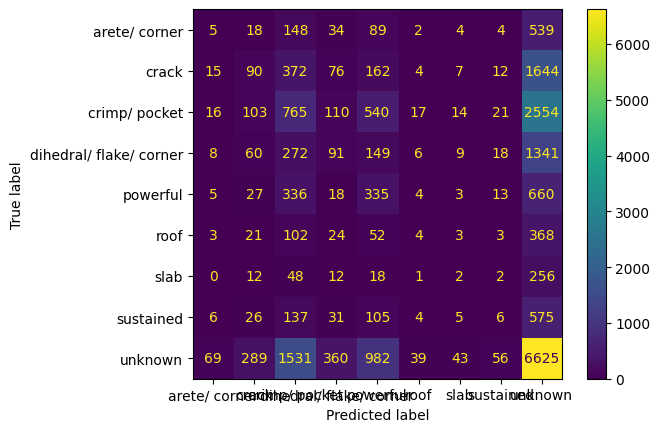

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mnb = MultinomialNB()
feat_train, feat_test, label_train, label_test = train_test_split(features, label_list, test_size=0.2)
mnb.fit(feat_train, label_train)
preds = mnb.predict(feat_test)
print("Confusion Matrix")

confusion_matrix = confusion_matrix(label_test, preds)
print(confusion_matrix)
label_names =  ["arete/ corner", "crack", "crimp/ pocket", "dihedral/ flake/ corner", "powerful", "roof", "slab", "sustained", "unknown"]
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels= label_names)

cm_display.plot()
plt.show()

In [78]:
from sklearn.metrics import precision_recall_fscore_support
(precision, recall, f1, support) = precision_recall_fscore_support(label_test, preds)
print("precision scores:", precision)
print("recall scores:", recall)
print("f1 scores:", f1)
print("Total true counts:", support)

precision scores: [0.03937008 0.13931889 0.2061439  0.12037037 0.13774671 0.04938272
 0.02222222 0.04444444 0.45495124]
recall scores: [0.0059312  0.03778338 0.18478261 0.04657114 0.23911492 0.00689655
 0.00569801 0.00670391 0.66289774]
f1 scores: [0.01030928 0.05944518 0.19487963 0.06715867 0.17479781 0.01210287
 0.00907029 0.01165049 0.53958299]
Total true counts: [ 843 2382 4140 1954 1401  580  351  895 9994]
